# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [4]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [6]:
# Solution 1
chipo.shape


(4622, 5)

In [7]:
# Solution 2
len(chipo)


4622

### Step 6. What is the number of columns in the dataset?

In [8]:
print(chipo.columns.value_counts().sum())

5


### Step 7. Print the name of all the columns.

In [9]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [10]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [11]:
chipo['item_name'].value_counts().head(1)

item_name
Chicken Bowl    726
Name: count, dtype: int64

### Step 10. For the most-ordered item, how many items were ordered?

In [12]:
chipo.groupby(['item_name'])['quantity'].agg(['sum']).sort_values(by='sum', ascending=False).head(1)

,sum
item_name,
Chicken Bowl,761


### Step 11. What was the most ordered item in the choice_description column?

In [13]:
chipo.groupby(['choice_description']).quantity.agg(['sum']).sort_values(by = ['sum'], ascending=False).head(1)

,sum
choice_description,
[Diet Coke],159


### Step 12. How many items were orderd in total?

In [14]:
chipo[['quantity']].agg(['sum'])

,quantity
sum,4972


### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [15]:
print(chipo['item_price'].dtype)

object


#### Step 13.b. Create a lambda function and change the type of item price

In [16]:
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x[1:]))

#### Step 13.c. Check the item price type

In [17]:
print(chipo['item_price'].dtype)

float64


### Step 14. How much was the revenue for the period in the dataset?

In [18]:
revenue = float((chipo['quantity'] * chipo['item_price']).sum())
print(revenue)

39237.02


### Step 15. How many orders were made in the period?

In [19]:
orders = int(chipo['order_id'].max())
print(orders)

1834


### Step 16. What is the average revenue amount per order?

In [20]:
# Solution 1
print(revenue / orders)


21.39423118865867


In [21]:
# Solution 2



### Step 17. How many different items are sold?

In [22]:
print(chipo['item_name'].value_counts().count())

50


In [55]:
orders_per_item = chipo.groupby(['item_name'])['order_id'].count().sort_values(ascending=False).head(20).reset_index()
orders_per_item = orders_per_item.rename(columns={'order_id': 'order_count'})
orders_per_item

,item_name,order_count
0,Chicken Bowl,726
1,Chicken Burrito,553
2,Chips and Guacamole,479
3,Steak Burrito,368
4,Canned Soft Drink,301
5,Steak Bowl,211
6,Chips,211
7,Bottled Water,162
8,Chicken Soft Tacos,115
9,Chicken Salad Bowl,110


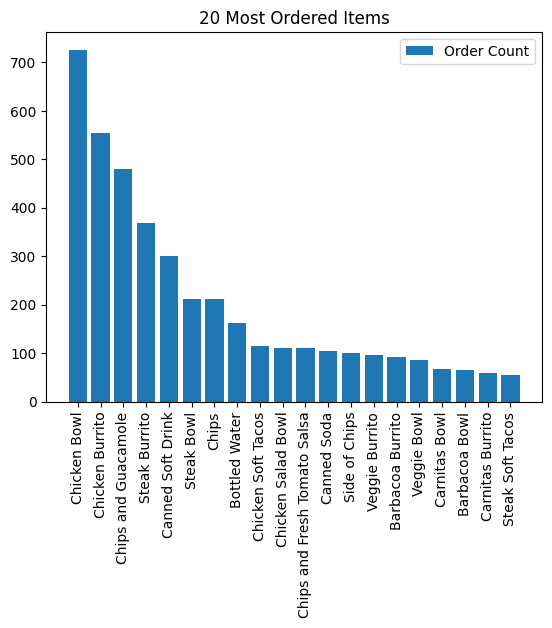

In [58]:
plt.bar(x = orders_per_item['item_name'], height = orders_per_item['order_count'], label = 'Order Count')
plt.legend()
plt.title('20 Most Ordered Items')
plt.xticks(rotation = 90)
plt.show()